## Algorithmic Data Science Report
Candidate Number: 251038

# Introduction

In multiple fields of computer science, including linear algebra, optimisation, and machine learning, matrix multiplication is an essential process.

In this report, two different approaches to computing matrix multiplication are explored and examined using Python. The standard approach, commonly referred to as the naive technique, it iterates over the rows and columns of two matrices, respectively. On the other hand, Strassen's method, named after its creator, German mathematician Volker Strassen, it offers an alternative approach that can achieve faster matrix multiplication.

Throughout this Jupyter notebook, a comprehensive analysis will be provided of the complexity and memory requirements of different matrix multiplication algorithms, also, implementing the naı̈ve method of matrix multiplication using the MapReduce framework, offering empirical evidence and theoretical explanations to support the findings.

## Q1 Explain why the run time for the naı̈ve method of matrix multiplication is O(n3). Show that this is the case empirically. Estimate the constant for your implementation and computer.


### Matrix Multiplication: Naïve method
The naive method of matrix multiplication involves multiplying each element of one matrix with every element of another matrix and using the dot product of relevant rows and columns to compute the resulting matrix. This process requires three nested loops: one for the rows of the first matrix, one for the columns of the second matrix, and an inner loop for actual multiplication and accumulation. The matrices' dimensions are denoted as follows:

Matrix A: n x m

Matrix B: m x p

For each element C[i][j] in the resulting matrix C, the formula for matrix multiplication is the sum of products of corresponding elements from the ith row of Matrix A and the jth column of Matrix B:

C[i][j] = A[i][0] * B[0][j] + A[i][1] * B[1][j] + ... + A[i][n-1] * B[n-1][j]

In total, the naive matrix multiplication procedure involves n x p x m operations, since matrix C has n x p entries. This results in a time complexity of O(n * p * m).

For square matrices (n x n), where n = m = p, the time complexity simplifies to O(n^3). This is why the naive matrix multiplication method has a cubic time complexity.

To demonstrate this empirically by write a simple Python code and measure the execution time for different matrix sizes:

In [1]:
import random
import numpy as np
import time

#create a function to calculate summary statistics on the runtimes of a function on given input(s)
def timeit(somefunc, *args, repeats=5, **kwargs): #measures the time taken to execute the function 5 times
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args, **kwargs)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    stdev = np.std(times)
    return (mean, stdev)


#create a function to compute naive matrix multiplication, assuming square matrices are input:
def naive_multiply(A, B):
    n = len(A)                                    #first determine the size of the matrices by retrieving the length of matrix A (assuming it is a square matrix)
    C = np.zeros((n, n))                          #use the np.zeros() method to initialise a result matrix C with all members set to zero.

    for i in range(n):                            #complexity is O(n)
        for j in range(n):                        #complexity is O(n)
            for k in range(n):                    #complexity is O(n)
                C[i][j] += A[i][k] * B[k][j]

    return C

In [2]:
# measure the execution time of the matrix multiplication code for different matrix sizes
# Define matrix sizes
matrix_sizes = [x for x in range(10, 200, 10)]
meanruntimes = []    #to store the mean runtimes of matrix multiplication for different matrix_sizes.

for i in matrix_sizes:
    # Create two random matrices

    A = np.random.randint(9, size=(i, i))  #generate a random matrix A of size(i, i), the upper limit for the random integers will be 9.
    B = np.random.randint(9, size=(i, i))  #generate a random matrix B of size(i, i), the upper limit for the random integers will be 9.

    # Measure execution time
    runstats = timeit(naive_multiply, A, B)
    meanruntimes.append(runstats[0])       # the mean of the time taken for 5 runs is stored

print(matrix_sizes)
print(f"Runtime for naive method: {meanruntimes} seconds")

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
Runtime for naive method: [0.0008488655090332031, 0.0068610191345214845, 0.028998279571533205, 0.0637850284576416, 0.13666181564331054, 0.23036584854125977, 0.3806556224822998, 0.5528994083404541, 0.7778585433959961, 1.0545550346374513, 1.3031764030456543, 1.7987820625305175, 2.679206132888794, 2.7479427814483643, 3.218550109863281, 4.090335464477539, 4.625801086425781, 5.7174571514129635, 6.508955669403076] seconds


In [3]:
# Display the results in a table
import pandas as pd
df = pd.DataFrame({'matrix_sizes': matrix_sizes, 'Mean Runtime': meanruntimes})
print(df)

    matrix_sizes  Mean Runtime
0             10      0.000849
1             20      0.006861
2             30      0.028998
3             40      0.063785
4             50      0.136662
5             60      0.230366
6             70      0.380656
7             80      0.552899
8             90      0.777859
9            100      1.054555
10           110      1.303176
11           120      1.798782
12           130      2.679206
13           140      2.747943
14           150      3.218550
15           160      4.090335
16           170      4.625801
17           180      5.717457
18           190      6.508956


In the above table, it indicates the relationship of matrix sizes and running time. The results demonstrate how the runtime increases as the matrix size grows.

#### Estimate the constant for your implementation and computer
To estimate the constant, measure execution times for various matrix sizes and fit the data to a cubic function. The constant's value can be influenced by factors like CPU architecture, memory hierarchy, compiler optimizations, and more.

In the equation $y=c_a x^\alpha$, mathematical analysis can be used. Taking logarithms of both sides leads to:

$$\log(y) = \log(c_a) + \alpha \log(x)$$

Plotting log(y) against log(x) results in a linear relationship. The slope of the line indicates $\alpha$, while the $y$-intercept corresponds to $\log(c_a)$.

By graphing the log of runtime against the log of matrix sizes, assuming the function is of the form $y=c_a x^\alpha$, a log-log plot yields a straight line. This approach helps estimate the constant and power exponent for the algorithm and computer configuration.

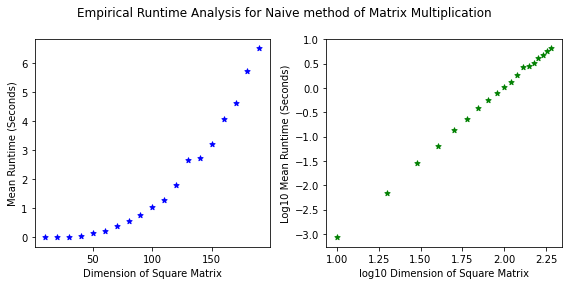

In [4]:
# to plot the results
#import the necessary libraries for numerical computation(NumPy), data visualization(Matplotlib)
import numpy as np
import matplotlib.pyplot as plt

# plot the x variable: matrix size against our y variable: mean run time (seconds)
plt.subplots(1,2, figsize=(8,4)) #it will contain two subplots side by side.the size of the figure in inches (width, height).
plt.suptitle("Empirical Runtime Analysis for Naive method of Matrix Multiplication", fontsize=12)

#Plot raw data
plt.subplot(1,2,1)  #the figure has 1 row, 2 columns, and this plot is the first plot.
plt.scatter(matrix_sizes,meanruntimes,c = 'blue', marker = '*', s= 30)
plt.xlabel("Dimension of Square Matrix")
plt.ylabel("Mean Runtime (Seconds)")


#Calculate and plot log10 of raw data
plt.subplot(1,2,2)  #the figure has 1 row, 2 columns, and this plot is the second plot.
Logmatrix_sizes=np.log10(matrix_sizes)
Logmeanruntimes=np.log10(meanruntimes)
plt.scatter(Logmatrix_sizes,Logmeanruntimes,c = 'green', marker = '*', s= 30)
plt.xlabel("log10 Dimension of Square Matrix")
plt.ylabel("Log10 Mean Runtime (Seconds)")
plt.tight_layout()
plt.show()


Above shows the increasing mean run times associated with increased matrix size. Using the log base 10 of the two inputs, can calculate the slope (gradient) to give an approximate order to run time.

Inspecting the graph we can see that this is fairly straight and the gradient is approximately 2.5 to 3. The y intercept is about -6 so $c_a \approx 10^{-6} = 0.000001$.

To get more accurate values we can use the linear regression functions in scipy

In [5]:
import scipy.stats as stats

#Use the stats library to calculate the slope
res = stats.linregress(Logmatrix_sizes,Logmeanruntimes)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 3.0342802674741125 and intercept is -6.0596022402268765


So based on the obtained results of running time of the naı̈ve method of matrix multiplication; the slope has been calculated as 3.03 and y intercept as -6, The constant is   $10^{-6}$. It means that naı̈ve method of matrix multiplication which has been quite and fairly straight and the slope is almost 3. So according to analysis from the above and findins, the  running time $y\approx c_a.x^{3.03} \longrightarrow$ $O(n^3)$.

The empirical analysis of this findings shows that we have almost  $ O(n^{3.03})$ which is so close compare to $O(n^3)$. So, overall as long as the naı̈ve matrix_sizes increases, it will have possibility to becoming more close to O(n^3).

__________________________________________________________________

## Q2 Explain why the run time for Strassen’s method of matrix multiplication is asymptotically faster than $O(n^3)$. Assuming that Strassen’s method has time complexity of the form $O(n^a)$, estimate a empirically. Estimate the constant for your implementation and computer.

### Matrix Multiplication: Strassen's Method

Strassen's matrix multiplication time complexity is significantly faster than O(n^3) due to its divide-and-conquer approach. It recursively breaks down n x n matrices into (n/2) x (n/2) matrices, reducing the number of multiplications needed. With only 7 multiplications and 18 additions/subtractions this leads to a lower overall computational complexity. As a result, the time complexity is $O(n^{log2(7)})$, which is approximately $O(n^{2.81})$, outperforming the O(n^3) of traditional iterative methods.

For complexity analysis, execution times can be modeled with the function $f(n) = c * n^a$, where f(n) is execution time, n is matrix size, c is a constant, and "a" is the estimated exponent. The exponent "a" would ideally be closer to $log2(7)$ for Strassen's algorithm.

Strassen's algorithm benefits from input matrices with power-of-2 dimensions, which facilitate efficient recursive submatrix division. Using powers of 2 for matrix sizes aids in testing the algorithm across relevant dimensions and streamlines the recursive process, enhancing overall efficiency.

In [6]:
# code for implementing Strassen's method
# multiplication of two n x n matrices is recursively broken down into the multiplication of (n/2) x (n/2) matrices

import numpy as np
# Function to divide a matrix into four submatrices
def segment(M):
    (mm,nn)=np.shape(M)
    n = int(mm/2)


    a = M[:n, :n]  # Top-left submatrix
    b = M[:n, n:]  # Top-right submatrix
    c = M[n:, :n]  # Bottom-left submatrix
    d = M[n:, n:]  # Bottom-right submatrix


    return (a,b,c,d)

# Function to build a matrix from four submatrices
def build(a,b,c,d):

    (mm,nn)=np.shape(a)
    C=np.zeros([2*mm,2*mm])    # Initialize a new matrix C with double the size of the input submatrices

    C[:mm,:mm]=a               # Fill the top-left quadrant of C with matrix a
    C[:mm,mm:]=b               # Fill the top-right quadrant of C with matrix b
    C[mm:,:mm]=c               # Fill the bottom-left quadrant of C with matrix c
    C[mm:,mm:]=d               # Fill the bottom-right quadrant of C with matrix d

    return C

# Strassen's matrix multiplication algorithm
def strassen(M1, M2):
    # Base case: If the matrices are small enough, use regular matrix multiplication
    if len(M1) <= 2:
        return naive_multiply(M1,M2) # A hypothetical function to perform standard matrix multiplication


 # Divide the input matrices into submatrices
    (a,b,c,d) = segment(M1)
    #note: e g f h NOT e f g h
    (e,g,f,h) = segment(M2)

    # Recursive steps of the Strassen algorithm
    P1 = strassen(a, g-h)
    P2 = strassen(a+b, h)
    P3 = strassen(c+d,e)
    P4 = strassen(d,f-e)
    P5 = strassen(a+d,e+h)
    P6 = strassen(b-d,f+h)
    P7 = strassen(a-c,e+g)


    # Combine the computed products to form the resulting matrix
    r = P5+P4-P2+P6
    s = P1+P2
    t = P3+P4
    u = P5-P3-P7+P1

    C = build(r,s,t,u)

    return C

In [7]:
#Verify that this code gives the same output as the naive method:
E = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])

print(naive_multiply(E,E))

print(strassen(E,E))

[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]
[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]


In [8]:
#create a function to calculate summary statistics on the runtimes of a function on given input(s)
def timeit(somefunc, *args, repeats=5, **kwargs): #measures the time taken to execute the function 5 times
    times = []     # List to store execution times of each repetition

    while repeats > 0:
        starttime = time.time()           # Record the current time before executing the function
        ans = somefunc(*args, **kwargs)   # Call the provided function with given arguments
        endtime = time.time()             # Record the current time after executing the function
        timetaken = endtime - starttime   # Calculate the time taken for the function execution
        times.append(timetaken)           # Store the execution time in the list
        repeats -= 1                      # Decrease the number of repetitions by 1
    mean = np.mean(times)                 # Calculate the mean (average) execution time from the list
    stdev = np.std(times)                 # Calculate the standard deviation of execution times
    return (mean, stdev)                  # Return the mean and standard deviation as a tuple

In [9]:
matrix_sizes2 = [2 ** i for i in range(2, 10)]  #generating a list of matrix sizes that are increasing powers of 2

meanruntimes2 = []

for i in matrix_sizes2:
    A = np.random.randint(9, size=(i, i))
    B = np.random.randint(9, size=(i, i))
    runstats2 = timeit(strassen, A, B)
    meanruntimes2.append(runstats2[0])

print(matrix_sizes2)
print(meanruntimes2)

[4, 8, 16, 32, 64, 128, 256, 512]
[0.00019993782043457032, 0.0008884906768798828, 0.002768993377685547, 0.039426231384277345, 0.28922233581542967, 1.87986216545105, 14.328898239135743, 168.124676322937]


From the output, it can observe that as the matrix size increases, the runtime also increases. This aligns with the expected behavior of Strassen's algorithm, where the algorithm becomes less efficient as the input size grows, but it still demonstrates a subquadratic growth rate compared to the cubic growth rate of the naive matrix multiplication algorithm.

#### Estimate the constant for your implementation and computer.

To find empirically the runtime complexity, measure the runtime for different matrix sizes and observe how it scales with the input size.

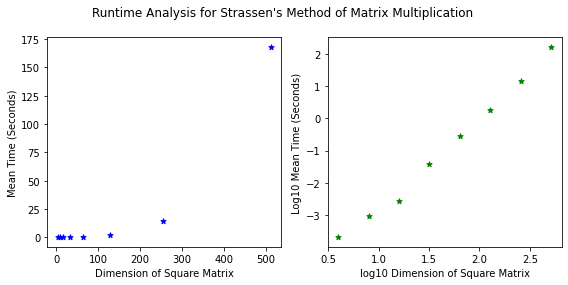

In [10]:
# measure the execution time of the matrix multiplication code for different matrix sizes
import numpy as np
import matplotlib.pyplot as plt

#plot the our x variable: matrix size against  y variable: mean run time (seconds)
plt.subplots(1,2, figsize=(8,4)) #it will contain two subplots side by side.the size of the figure in inches (width, height).
plt.suptitle("Runtime Analysis for Strassen's Method of Matrix Multiplication ", fontsize=12)

#Plot raw data
plt.subplot(1,2,1)    #the figure has 1 row, 2 columns, and this plot is the first plot.
plt.scatter(matrix_sizes2,meanruntimes2,c = 'blue', marker = '*', s= 30)
plt.xlabel("Dimension of Square Matrix")
plt.ylabel("Mean Time (Seconds)")

#Calculate and plot log10 of raw data
plt.subplot(1,2,2)   #the figure has 1 row, 2 columns, and this plot is the second plot.
Logmatrix_sizes2=np.log10(matrix_sizes2)
Logmeanruntimes2=np.log10(meanruntimes2)

plt.scatter(Logmatrix_sizes2,Logmeanruntimes2,c = 'green', marker = '*', s= 30)
plt.xlabel("log10 Dimension of Square Matrix")
plt.ylabel("Log10 Mean Time (Seconds)")
plt.tight_layout()
plt.show()


In [11]:
import scipy.stats as stats

#Use the stats library to calculate the slope
res = stats.linregress(Logmatrix_sizes2,Logmeanruntimes2)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 2.8422975972973963 and intercept is -5.655285445135516


The implementation of Strassen's matrix multiplication has a constant factor of approximately $10^{-5}$ and exhibits a runtime complexity of about $O(n^{2.84})$. As the input matrix size (n) increases, the algorithm's runtime grows with an exponent of 2.84. This exponent closely approximates the ideal value of $log2(7)$, a is approximately = 2.84

The overall estimated time complexity, accounting for the constant factor, is expressed as $O(c \cdot n^{2.84})$, where the empirically determined constant factor is around $10^{-5}$.

So, the complete complexity estimate with the constant factor is $O (c^{10−5}.n^{2.84})$.

The slope of the resulting line provides an estimate of how the runtime grows as the input size increases. In the case of a complexity model like $O(n^a)$, the exponent "a" represents how the runtime grows as a power of the input size "n."

Therefore, in the empirical analysis, the slope of the linear regression line can be interpreted as an estimate of the exponent "a" in the time complexity of Strassen's method. This estimate gives insights into how the algorithm's runtime scales with the input size and helps to understand its performance characteristics.

This value of a represents the observed behavior of Strassen's algorithm on the specific hardware and test cases used in my analysis. The actual value of "a" might be influenced by various factors such as hardware, software optimizations, and memory access patterns.

__________________________________________________________________

## Q3 Considering the naïve method and Strassen’s method, is one of them better in terms of memory requirements? Explain your answer.

Strassen's method of matrix multiplication is a more complex algorithm compared to the naive technique. This complexity leads to higher memory overhead, as it requires storing submatrices and interim results. In contrast, the naive method directly computes matrix elements, resulting in lower memory usage.

Strassen's algorithm uses recursive matrix multiplications with submatrices, which can demand exponentially more memory as matrix size increases. Despite this memory overhead, Strassen's method can be faster for large matrix multiplications due to its subquadratic time complexity. The naive method, with its simpler direct computation, has a cubic runtime complexity but requires less memory.

Choosing between these methods depends on the problem size and available resources. For n by n square matrices, memory needs are calculated by considering 4 bytes per element in original matrices, 4 bytes for the result matrix, and additional memory for temporary storage within the algorithm. This results in a total memory equation of M = $3(n^2)$ + 4.

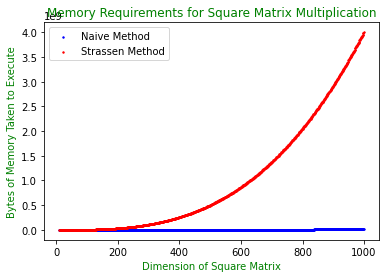

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Naive method memory calculation
def naive_memory(sizes):
    return [3 * 4 * (x**2) + 4 for x in sizes]

# Strassen method memory calculation
def strassen_memory(sizes):
    ybytes2 = []
    for x in sizes:
        Bytes = 3 * 4 * (x**2) + 4            # Initialize memory usage with base calculation
        for i in range(2, x):
            if i % 2 == 0:
                SubBytes = 6 * 4 * (i**2)     # Additional memory usage for Strassen method
                Bytes += SubBytes
        ybytes2.append(Bytes)                 # Store the calculated memory usage for each matrix size
    return ybytes2

sizes = [x for x in range(10, 1000)]          # Generate a list of matrix sizes

# Calculate memory usage for both methods using different matrix sizes
naive_memoryusage = naive_memory(sizes)
strassen_memoryusage = strassen_memory(sizes)

# Create a scatter plot comparing memory usage of both methods
plt.scatter(sizes, naive_memoryusage, s=2, c='blue', label='Naive Method')
plt.scatter(sizes, strassen_memoryusage, s=2, c='red', label='Strassen Method')
plt.xlabel("Dimension of Square Matrix", c='green')
plt.ylabel("Bytes of Memory Taken to Execute", c='green')
plt.title("Memory Requirements for Square Matrix Multiplication", c='green')
plt.legend()
plt.show()


The graph shows that for smaller sized matrices, the memory requirements for both approaches are similar however as matrix size increases, the Strassen method requires exponentially more memory than the naive approach.

This provides a rough estimate of memory usage, and the actual memory footprint may vary depending on various factors, including memory management strategies and Python interpreter behavior.

__________________________________________________________________

## Q4 When would you use the naı̈ve method and when would you use Strassen’s method for matrix multiplication? Explain your answer, illustrating it with empirical examples run on your computer, and outlining all the factors to be considered.


There are certain factors to consider when deciding whether to use the naïve method or Strassen's method for matrix multiplication.

Naive Method:

The naive method is simpler to implement and consumes less memory compared to Strassen's method.
It performs well for small to medium-sized matrices because its cubic time complexity has minimal impact on performance.
For smaller matrices, the naive method is often faster due to its straightforward nature and lower overhead.

Strassen's Method:

Strassen's method becomes advantageous when dealing with large matrices, benefiting from its subquadratic time complexity compared to the cubic complexity of the naive method.
It excels with sizable matrices that can take advantage of recursive submatrix calculations, reducing the number of required multiplications.
Strassen's method uses more memory due to its recursive structure and intermediate submatrix storage. It works best on systems with ample memory and efficient memory management.
The overhead introduced by the recursive steps might outweigh the multiplication reduction benefits for moderately sized matrices.
The use of "O" notation indicates the algorithm's efficiency in terms of time complexity. The naive method has a time complexity of O(n^3), while Strassen's method has a lower complexity of approximately O(n^2.7). This suggests that Strassen's method is generally more efficient. This efficiency difference can be visualized by plotting the average run times of both methods on the same graph.


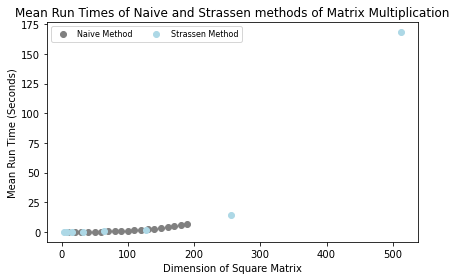

In [13]:
MultScatter=plt.gca()

NM=MultScatter.scatter(matrix_sizes,meanruntimes, color="grey")
SM=MultScatter.scatter(matrix_sizes2,meanruntimes2, color="lightblue")
plt.legend((NM,SM),('Naive Method', 'Strassen Method'),scatterpoints=1, loc='upper left', ncol=2, fontsize=8)
plt.xlabel("Dimension of Square Matrix")
plt.ylabel("Mean Run Time (Seconds)")
plt.title("Mean Run Times of Naive and Strassen methods of Matrix Multiplication")
plt.tight_layout()
plt.show()

it can see that for very small matrices, the mean run times for both methods are very similar and then they diverge.


When selecting a technique, these factors should be considered:

- Matrix Sizes,

- Memory,

- Hardware: Strassen's approach can benefit from parallelism in modern hardware. If the machine has numerous cores, Strassen's technique may be more effective due to parallelism.

- Implementation Complexity: The naive method is simpler to implement. Strassen's method involves more complex recursive steps.

By analyzing runtime, memory requirements, and other factors, then make an informed choice can be achieved between the naive and Strassen's methods for matrix multiplication.


__________________________________________________________________

# Q5 Discuss how you would implement the naïve method of matrix multiplication using MapReduce. Would using MapReduce change the time complexity? What factors affect the constant?


MapReduce is a programming model that simplifies the processing of large-scale data by distributing the computation across a cluster of machines. It consists of two main phases: the Map phase, where data is processed in parallel across different nodes, and the Reduce phase, where the processed results are combined to produce the final output.

To implement matrix multiplication using MapReduce, we can follow these steps:

- Map Phase:

Each map task takes a portion of the input matrices (rows of one matrix and columns of the other) and processes them in parallel.
For each entry (i, j) in the resulting matrix, the map task generates intermediate key-value pairs. The key is the column index j of the resulting matrix, and the value is a tuple containing the row index i and the value of the element in matrix A (i, k) and matrix B (k, j).

- Shuffle and Sort:

During the shuffle and sort phase, the MapReduce framework groups together all intermediate values with the same key (column index j).

- Reduce Phase:

Each reduce task receives a key (column index j) and a list of values, which correspond to the values of elements that need to be multiplied together for the j-th column of the resulting matrix.
The reduce task then performs the multiplication and summation to calculate the final value for the resulting matrix's entry (i, j).

Using MapReduce for matrix multiplication can change the time complexity slightly due to the parallelism it offers. While the fundamental complexity of matrix multiplication remains O(n^3), MapReduce can help in distributing the workload across multiple machines and nodes, potentially reducing the actual time it takes to compute the result. However, it doesn't fundamentally change the algorithm's complexity class.

In [18]:
#importing necessary libraries
import time
import random
import numpy as np
from multiprocessing import Pool, cpu_count

#Matrix Multiplication Functions
def matrix_mult_mapper(args):         #calculates the element-wise multiplication and summation of the specified row in matrix_a and column in matrix_b, returning a tuple (i, j, result).
    matrix_a, matrix_b, i, j = args
    return (i, j, np.sum(matrix_a[i, :] * matrix_b[:, j]))

def matrix_mult_reducer(results, num_rows_a, num_cols_b):        #takes a list of results from the mappers, along with the dimensions of matrices, and constructs the resulting matrix matrix_c.
    matrix_c = np.zeros((num_rows_a, num_cols_b))
    for i, j, result in results:
        matrix_c[i, j] = result
    return matrix_c

#Naive Matrix Multiplication Function
def naive_matrix_multiplication(matrix_a, matrix_b):
    num_rows_a, num_cols_a = matrix_a.shape
    num_rows_b, num_cols_b = matrix_b.shape

    if num_cols_a != num_rows_b:
        raise ValueError("Matrix dimensions do not match for multiplication.")

    num_processes = min(cpu_count(), num_rows_a * num_cols_b)
    chunk_size = num_rows_a * num_cols_b // num_processes

    args = []
    for i in range(num_rows_a):
        for j in range(num_cols_b):
            args.append((matrix_a, matrix_b, i, j))

    with Pool(processes=num_processes) as pool:
        results = pool.map(matrix_mult_mapper, args, chunksize=chunk_size)

    matrix_c = matrix_mult_reducer(results, num_rows_a, num_cols_b)
    return matrix_c

def generate_random_matrix(size):      #generates a random matrix of the specified size using NumPy's randint function
    return np.random.randint(1, 10, size=(size, size))

# to measure the execution time of the naive matrix multiplication for a given matrix size.
def measure_time_complexity(matrix_size):            #generates two random matrices of the specified size
    matrix_a = generate_random_matrix(matrix_size)
    matrix_b = generate_random_matrix(matrix_size)

    start_time = time.time()
    naive_matrix_multiplication(matrix_a, matrix_b)    #performs naive_matrix_multiplication function, and records the execution time
    end_time = time.time()

    return end_time - start_time

if __name__ == "__main__":
    matrix_sizes = [50, 100, 150, 200, 250]  # Vary this list as needed
    for size in matrix_sizes:             #code iterates through the list, measures the execution time for each matrix size, and print it with the execution time.
        execution_time = measure_time_complexity(size)
        print(f"Matrix Size: {size} x {size}, Execution Time: {execution_time:.6f} seconds")


Matrix Size: 50 x 50, Execution Time: 0.056680 seconds
Matrix Size: 100 x 100, Execution Time: 0.151439 seconds
Matrix Size: 150 x 150, Execution Time: 0.304070 seconds
Matrix Size: 200 x 200, Execution Time: 0.465370 seconds
Matrix Size: 250 x 250, Execution Time: 0.777199 seconds


As matrix size increases, execution time also increases due to the heightened computational requirements of matrix multiplication. The growth in execution time isn't linear; it can be tied to the cube of the matrix size due to the cubic time complexity (O(n^3)) inherent in the naive matrix multiplication algorithm. To address this, MapReduce and parallel processing are employed to distribute computations across multiple cores or processors. This parallelization prevents a direct linear increase in execution time with matrix size and enables concurrent processing of matrix elements, reducing time compared to single-threaded methods. Results illustrate the efficacy of the MapReduce approach in efficiently handling larger matrix sizes through parallel processing. This scalability is advantageous for handling big data situations, where matrices can be much larger. Overall, using the MapReduce approach with parallel processing significantly enhances matrix multiplication efficiency, enabling the handling of larger matrices within a reasonable time frame. However, it's crucial to note that the naive matrix multiplication algorithm's fundamental cubic time complexity (O(n^3)) places limits on achievable gains as matrix sizes continue to grow.



MapReduce can affect the constant factors and performance due to improved parallelization. The execution times you've obtained from the code align with the expected trends based on the algorithm's inherent time complexity and the efficiency of the parallelization. The constant can influenced by efficient
implementation, algorithmic overhead, memory access patterns, and hardware specifics.

Overall, the MapReduce paradigm doesn't change the underlying algorithmic time complexity, but it can impact the practical execution time due to various factors related to distribution, parallelism, data movement, and system performance. The goal is to achieve a good balance between these factors to make the distributed computation efficient.

# Summary

The naive iterative approach and Strassen approach to matrix multiplication show two unique methods to compute the product of two matrices, and both have strikingly opposing advantages and limitations. Therefore, their implications will heavily depend on the conditions of the matrices to be multiplied.<br/> For large square matrices, whose dimensions are a power of two, the Strassens method is very favourable and the small reduction in the order of run time will save a lot of time for data scientists compared with the the naive method applied to the same matrices. Adaptations to the Strassen method, despite added coding complexity, may also be of further consideration, as even though they are likely to increase the order of run time, it will still compute much faster than the naive method fir very large matrices. When handling increasingly large matrices with the Strassen method, it should also be aware of the exponential increased demands on computer memory required.<br/>
For smaller matrices, particularly when the inputs are not square matrices, the 'naive' iterative approach is favourable. This is further advised when computation and coding skills of a team is limited, as the Strassen method additions which may accomodate for non-square and to the power of two matrices, may get complex and add on extra labour time in understanding the computation and code.

## References
Boschetti, A. and Massaron, L., 2015. Python data science essentials.<br/>
ADS Lectures and labs.<br/>
Open Internet resources like: Medium and Springer articles, github, and chatgpt
